# Importacion y analisis inicial

In [5]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

base_dir = Path().resolve().parent
# Ruta al archivo
dataset_path = base_dir / 'data' / 'raw' / 'PS_20174392719_1491204439457_log.csv'


# Cargar dataset
df = pd.read_csv(dataset_path)

# Mostrar dimensiones del dataset
print(f"Dimensiones del dataset: {df.shape}")

Dimensiones del dataset: (6362620, 11)


In [6]:
# Primeras filas
print("\nPrimeras filas:")
df.head()


Primeras filas:


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
# Información general
print("\nInformación del dataset:")
print(df.info())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None


In [9]:
# Estadísticas generales
print("\nEstadísticas descriptivas:")
df.describe()


Estadísticas descriptivas:


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


# Visualizacion

isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64


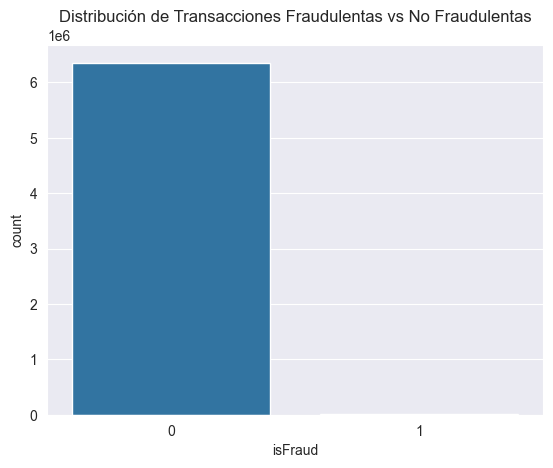

In [38]:
# Distribución de clases
sns.countplot(data=df, x='isFraud')
plt.title("Distribución de Transacciones Fraudulentas vs No Fraudulentas")
print(df['isFraud'].value_counts(normalize=True))
plt.show()

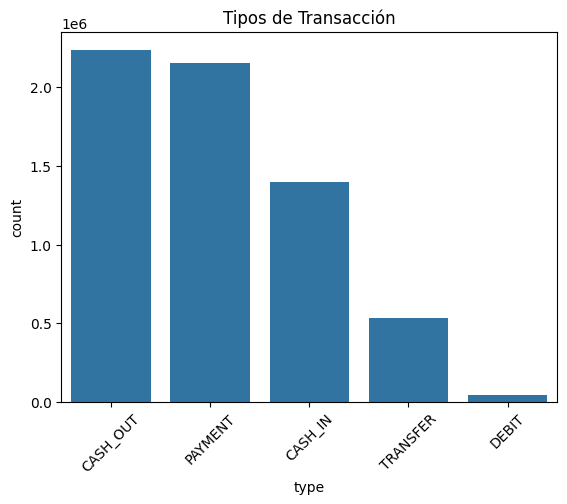

In [18]:
# Tipos de transacción
sns.countplot(data=df, x='type', order=df['type'].value_counts().index)
plt.title("Tipos de Transacción")
plt.xticks(rotation=45)
plt.show()

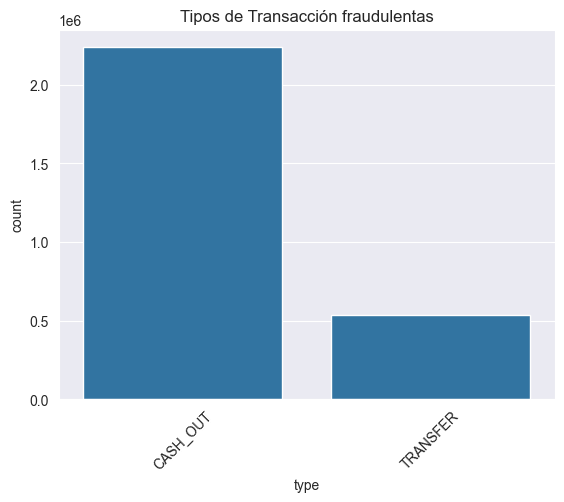

In [37]:
# Tipos de transacción fraudulenta
sns.countplot(data=df, x='type', order=df[df['isFraud']==1]['type'].value_counts().index)
plt.title("Tipos de Transacción fraudulentas")
plt.xticks(rotation=45)
plt.show()

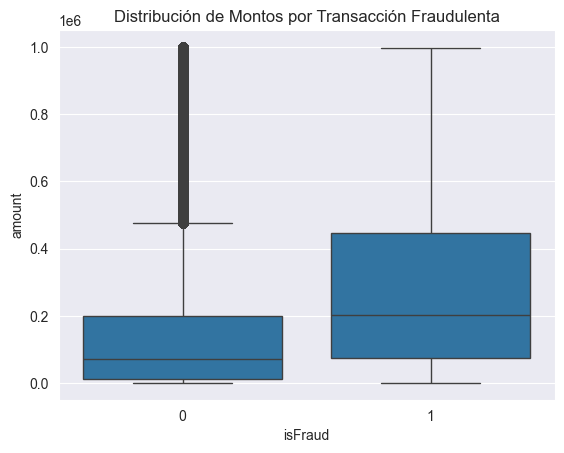

In [33]:
# Comparar montos fraudulentos vs no fraudulentos
sns.boxplot(data=df[df['amount'] < 1000000], x='isFraud', y='amount')
plt.title("Distribución de Montos por Transacción Fraudulenta")
plt.show()

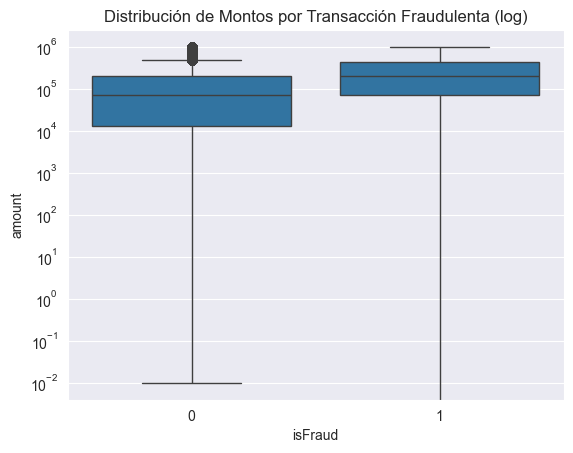

In [34]:
# Comparar montos fraudulentos vs no fraudulentos
sns.boxplot(data=df[df['amount'] < 1000000], x='isFraud', y='amount')
plt.title("Distribución de Montos por Transacción Fraudulenta (log)")
plt.yscale('log')
plt.show()

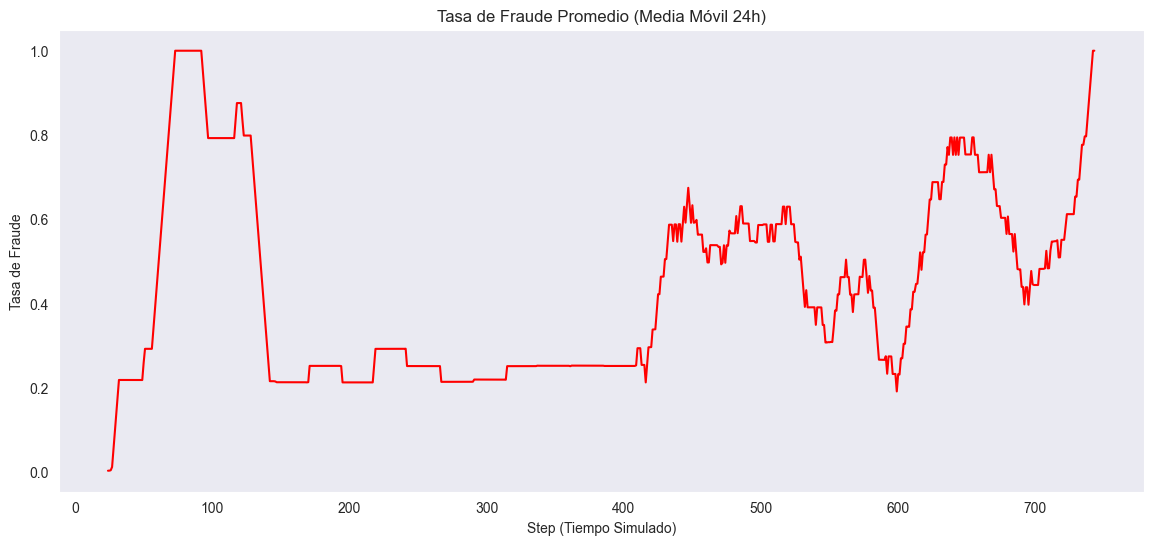

In [30]:
# Fraude por paso de tiempo
fraud_by_step = df.groupby('step')['isFraud'].mean().rolling(window=24).mean()  # Media móvil 24h

plt.figure(figsize=(14, 6))
fraud_by_step.plot(color='red')
plt.title('Tasa de Fraude Promedio (Media Móvil 24h)')
plt.ylabel('Tasa de Fraude')
plt.xlabel('Step (Tiempo Simulado)')
plt.grid()
plt.show()

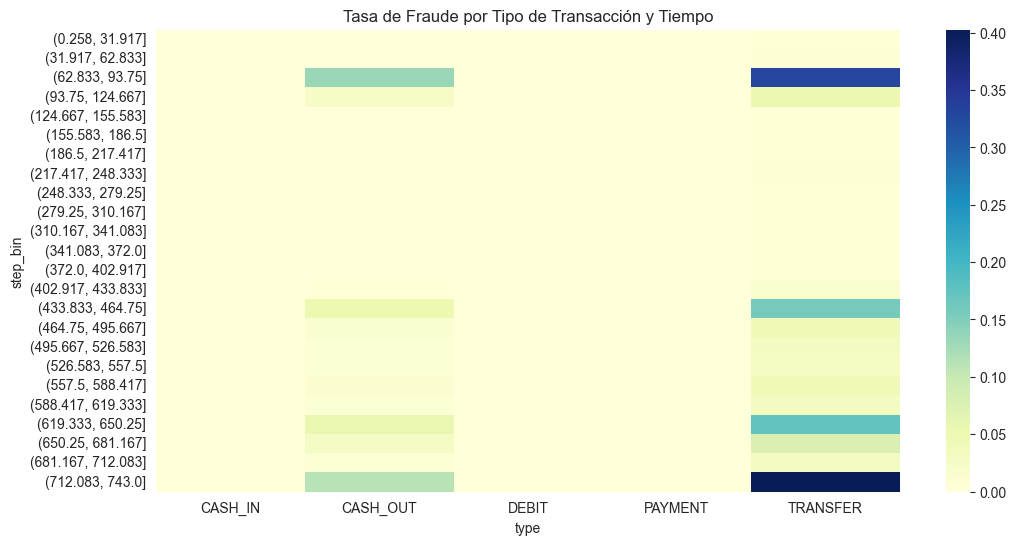

In [39]:
# Crear bins para el tiempo (ej: 24 horas)
df["step_bin"] = pd.cut(df["step"], bins=24)

# Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pd.crosstab(df["step_bin"], df["type"], 
                       values=df["isFraud"], aggfunc="mean"),
            cmap="YlGnBu")
plt.title("Tasa de Fraude por Tipo de Transacción y Tiempo")
plt.show()

# Limpieza

In [40]:
df_clean = df.drop_duplicates()
print(f"Registros originales: {len(df)} | Registros limpios: {len(df_clean)}")

Registros originales: 6362620 | Registros limpios: 6362620


In [41]:
# Verificar nulos por columna
print(df_clean.isnull().sum())

# Si hay nulos en 'amount' (raro en este dataset):
df_clean["amount"] = df_clean["amount"].fillna(df_clean["amount"].median())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
step_bin          0
dtype: int64


In [47]:
# Creacion de columna normalizada de la cantidad de la transacción
df_clean["amount_log"] = np.log(df_clean["amount"] + 1)

# Procesado de datos

In [ ]:
# Guardar datos procesados